<>:31: SyntaxWarning: invalid escape sequence '\D'
<>:31: SyntaxWarning: invalid escape sequence '\D'
/var/folders/d9/ky88pccj37q7bb6l2r_wfv7r0000gn/T/ipykernel_14578/427424120.py:31: SyntaxWarning: invalid escape sequence '\D'
  axes[0].set_ylabel("Percent increase in the mean\navailability of susceptible hosts, $\Delta H(s)$", fontsize=19, labelpad=20)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


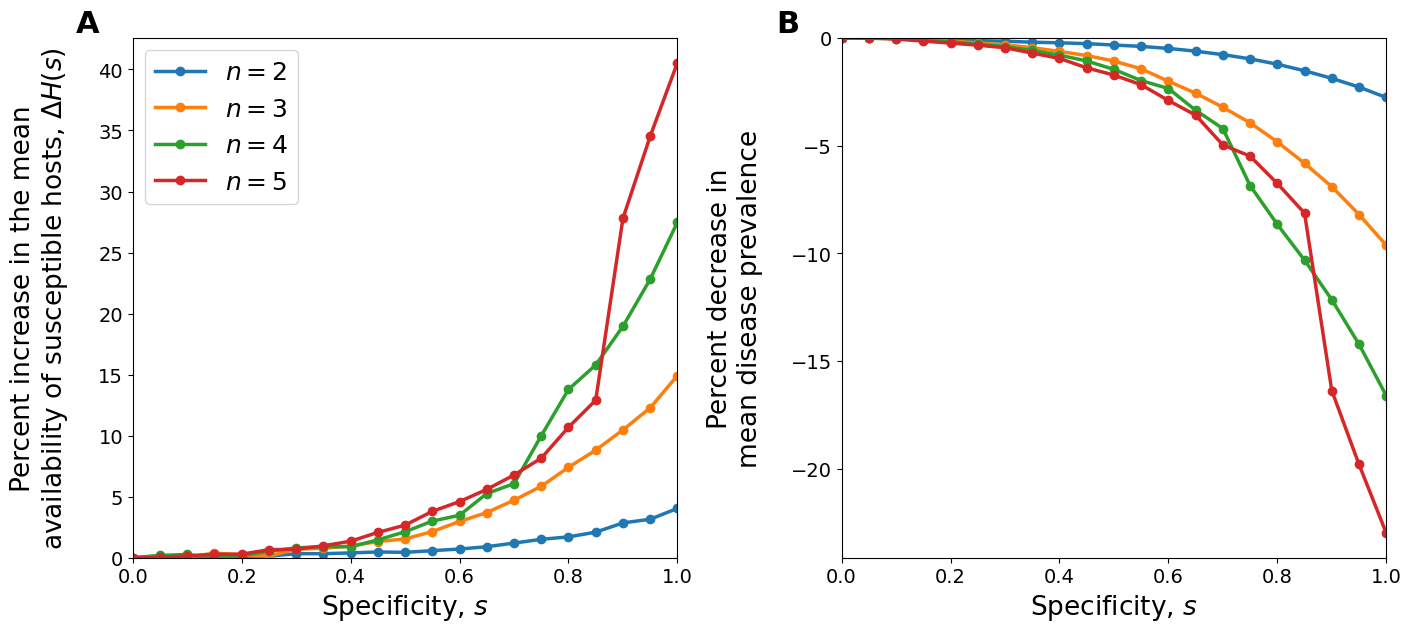

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("mean_host.csv")

records_H = []
records_P = []

for n_val, dsub in df.groupby("n"):
    dsub = dsub.sort_values("s")

    # Baselines at s = 0
    baseline_H = dsub.loc[dsub["s"] == 0, "mean_H"].values[0]
    baseline_P = dsub.loc[dsub["s"] == 0, "mean_dis_prev"].values[0]

    pct_change_H = 100 * (dsub["mean_H"] - baseline_H) / baseline_H
    pct_change_P = 100 * (dsub["mean_dis_prev"] - baseline_P) / baseline_P

    records_H.append((n_val, dsub["s"].values, pct_change_H.values))
    records_P.append((n_val, dsub["s"].values, pct_change_P.values))

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 6), constrained_layout=True)

# Left plot: Host density
for n_val, s_vec, pct_vec in records_H:
    axes[0].plot(s_vec, pct_vec, marker="o", linewidth=2.5, markersize=6, label=fr"$n={n_val}$")

axes[0].set_xlabel(r"Specificity, $s$", fontsize=19)
axes[0].set_ylabel("Percent increase in the mean\navailability of susceptible hosts, $\Delta H(s)$", fontsize=19, labelpad=20)
axes[0].tick_params(labelsize=14)
axes[0].legend(fontsize=18)
axes[0].set_xlim(0, 1)
axes[0].set_ylim(bottom=0)

# Right plot: Disease prevalence
for n_val, s_vec, pct_vec in records_P:
    axes[1].plot(s_vec, pct_vec, marker="o", linewidth=2.5, markersize=6, label=fr"$n={n_val}$")

axes[1].set_xlabel(r"Specificity, $s$", fontsize=19)
axes[1].set_ylabel("Percent decrease in\nmean disease prevalence", fontsize=19, labelpad=20)
axes[1].tick_params(labelsize=14)
axes[1].set_xlim(0, 1)
axes[1].set_ylim(top=0)

# Add subplot labels A and B
fig.text(0.05, 0.99, "A", fontsize=22, fontweight="bold")
fig.text(0.55, 0.99, "B", fontsize=22, fontweight="bold")

plt.savefig("mean_host.eps", dpi=600, bbox_inches='tight')
plt.show()